# Setup/Imports

In [1]:
import sys
import os
from pylab import *
%matplotlib inline

* Import Caffe using 'caffe_root'

In [2]:
caffe_root = '/Users/Kallie/caffe'

sys.path.insert(0, '/Users/Kallie/anaconda3/envs/final/lib')

#Add path for python layers
sys.path.insert(0, '/Users/Kallie/caffe/python/caffe/layers')

sys.path.insert(0, caffe_root + 'python')
import caffe

# Build LeNet Architecture for MNIST

* Vanilla LeNet

In [3]:
from caffe import layers as L, params as P

def lenet(lmdb, batch_size):
    # our version of LeNet: a series of linear and simple nonlinear transformations
    n = caffe.NetSpec()
    
    n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
                             transform_param=dict(scale=1./255), ntop=2)
    
    n.conv1 = L.Convolution(n.data, kernel_size=5, num_output=20, weight_filler=dict(type='xavier'))
    n.pool1 = L.Pooling(n.conv1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.conv2 = L.Convolution(n.pool1, kernel_size=5, num_output=50, weight_filler=dict(type='xavier'))
    n.pool2 = L.Pooling(n.conv2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.fc1 =   L.InnerProduct(n.pool2, num_output=500, weight_filler=dict(type='xavier'))
    n.relu1 = L.ReLU(n.fc1, in_place=True)
    n.score = L.InnerProduct(n.relu1, num_output=10, weight_filler=dict(type='xavier'))
    n.loss =  L.SoftmaxWithLoss(n.score, n.label)
    
    return n.to_proto()
    
with open('mnist/lenet_auto_train.prototxt', 'w') as f:
    f.write(str(lenet('mnist/mnist_train_lmdb', 64)))
    
with open('mnist/lenet_auto_test.prototxt', 'w') as f:
    f.write(str(lenet('mnist/mnist_test_lmdb', 100)))

* LeNet With Final Vanilla Dropout Layer

In [4]:
from caffe import layers as L, params as P

def lenet_last_vanilla_dropout(lmdb, batch_size):
    # our version of LeNet: a series of linear and simple nonlinear transformations
    n = caffe.NetSpec()
    
    n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
                             transform_param=dict(scale=1./255), ntop=2)
    
    n.conv1 = L.Convolution(n.data, kernel_size=5, num_output=20, weight_filler=dict(type='xavier'))
    n.pool1 = L.Pooling(n.conv1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.conv2 = L.Convolution(n.pool1, kernel_size=5, num_output=50, weight_filler=dict(type='xavier'))
    n.drop1 = L.Dropout(n.conv2, dropout_ratio=0.5)
    n.pool2 = L.Pooling(n.drop1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.fc1 =   L.InnerProduct(n.pool2, num_output=500, weight_filler=dict(type='xavier'))
    n.relu1 = L.ReLU(n.fc1, in_place=True)
    n.score = L.InnerProduct(n.relu1, num_output=10, weight_filler=dict(type='xavier'))
    n.loss =  L.SoftmaxWithLoss(n.score, n.label)
    
    return n.to_proto()
    
with open('mnist/lenet_last_vanilla_dropout_auto_train.prototxt', 'w') as f:
    f.write(str(lenet_last_vanilla_dropout('mnist/mnist_train_lmdb', 64)))
    
with open('mnist/lenet_last_vanilla_dropout_auto_test.prototxt', 'w') as f:
    f.write(str(lenet_last_vanilla_dropout('mnist/mnist_test_lmdb', 100)))

* Lenet with All Vanilla Dropout

In [5]:
from caffe import layers as L, params as P

def lenet_all_vanilla_dropout(lmdb, batch_size):
    # our version of LeNet: a series of linear and simple nonlinear transformations
    n = caffe.NetSpec()
    
    n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
                             transform_param=dict(scale=1./255), ntop=2)
    
    n.conv1 = L.Convolution(n.data, kernel_size=5, num_output=20, weight_filler=dict(type='xavier'))
    n.drop1 = L.Dropout(n.conv1, dropout_ratio=0.5)
    n.pool1 = L.Pooling(n.drop1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.conv2 = L.Convolution(n.pool1, kernel_size=5, num_output=50, weight_filler=dict(type='xavier'))
    n.drop2 = L.Dropout(n.conv2, dropout_ratio=0.5)
    n.pool2 = L.Pooling(n.drop2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.fc1 =   L.InnerProduct(n.pool2, num_output=500, weight_filler=dict(type='xavier'))
    n.relu1 = L.ReLU(n.fc1, in_place=True)
    n.score = L.InnerProduct(n.relu1, num_output=10, weight_filler=dict(type='xavier'))
    n.loss =  L.SoftmaxWithLoss(n.score, n.label)
    
    return n.to_proto()
    
with open('mnist/lenet_all_vanilla_dropout_auto_train.prototxt', 'w') as f:
    f.write(str(lenet_all_vanilla_dropout('mnist/mnist_train_lmdb', 64)))
    
with open('mnist/lenet_all_vanilla_dropout_auto_test.prototxt', 'w') as f:
    f.write(str(lenet_all_vanilla_dropout('mnist/mnist_test_lmdb', 100)))

* Lenet with Final Modified Dropout Layer

In [6]:
from caffe import layers as L, params as P

def lenet_last_mod_dropout(lmdb, batch_size):
    # our version of LeNet: a series of linear and simple nonlinear transformations
    n = caffe.NetSpec()
    
    n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
                             transform_param=dict(scale=1./255), ntop=2)
    
    n.conv1 = L.Convolution(n.data, kernel_size=5, num_output=20, weight_filler=dict(type='xavier'))
    n.pool1 = L.Pooling(n.conv1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.conv2 = L.Convolution(n.pool1, kernel_size=5, num_output=50, weight_filler=dict(type='xavier'))
    n.drop1 = L.Python(n.conv2, name='drop1', ntop=1, python_param={'module': 'Dropout_M',
                           'layer': 'Dropout_M_Layer'})
    n.pool2 = L.Pooling(n.drop1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.fc1 =   L.InnerProduct(n.pool2, num_output=500, weight_filler=dict(type='xavier'))
    n.relu1 = L.ReLU(n.fc1, in_place=True)
    n.score = L.InnerProduct(n.relu1, num_output=10, weight_filler=dict(type='xavier'))
    n.loss =  L.SoftmaxWithLoss(n.score, n.label)
    
    return n.to_proto()
    
with open('mnist/lenet_last_mod_dropout_auto_train.prototxt', 'w') as f:
    f.write(str(lenet_last_mod_dropout('mnist/mnist_train_lmdb', 64)))
    
with open('mnist/lenet_last_mod_dropout_auto_test.prototxt', 'w') as f:
    f.write(str(lenet_last_mod_dropout('mnist/mnist_test_lmdb', 100)))

* Lenet with All Modified Dropout

In [7]:
from caffe import layers as L, params as P

def lenet_all_mod_dropout(lmdb, batch_size):
    # our version of LeNet: a series of linear and simple nonlinear transformations
    n = caffe.NetSpec()
    
    n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
                             transform_param=dict(scale=1./255), ntop=2)
    
    n.conv1 = L.Convolution(n.data, kernel_size=5, num_output=20, weight_filler=dict(type='xavier'))
    n.drop1 = L.Python(n.conv1, name='drop1', ntop=1, python_param={'module': 'Dropout_M',
                           'layer': 'Dropout_M_Layer'})
    n.pool1 = L.Pooling(n.drop1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.conv2 = L.Convolution(n.pool1, kernel_size=5, num_output=50, weight_filler=dict(type='xavier'))
    n.drop2 = L.Python(n.conv2, name='drop1', ntop=1, python_param={'module': 'Dropout_M',
                           'layer': 'Dropout_M_Layer'})
    n.pool2 = L.Pooling(n.drop2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.fc1 =   L.InnerProduct(n.pool2, num_output=500, weight_filler=dict(type='xavier'))
    n.relu1 = L.ReLU(n.fc1, in_place=True)
    n.score = L.InnerProduct(n.relu1, num_output=10, weight_filler=dict(type='xavier'))
    n.loss =  L.SoftmaxWithLoss(n.score, n.label)
    
    return n.to_proto()
    
with open('mnist/lenet_all_mod_dropout_auto_train.prototxt', 'w') as f:
    f.write(str(lenet_all_mod_dropout('mnist/mnist_train_lmdb', 64)))
    
with open('mnist/lenet_all_mod_dropout_auto_test.prototxt', 'w') as f:
    f.write(str(lenet_all_mod_dropout('mnist/mnist_test_lmdb', 100)))

# Load the Solver
* Change Solver based on LeNet You Want to Run

In [8]:
caffe.set_mode_cpu()

### load the solver and create train and test nets
solver = None  # ignore this workaround for lmdb data (can't instantiate two solvers on the same data)

# 'mnist/lenet_auto_solver.prototxt'
# 'mnist/lenet_last_vanilla_dropout_auto_solver.prototxt'
# 'mnist/lenet_all_vanilla_dropout_auto_solver.prototxt'
# 'mnist/lenet_last_mod_dropout_auto_solver.prototxt'
# 'mnist/lenet_all_mod_dropout_auto_solver.prototxt'
solver = caffe.SGDSolver('mnist/lenet_last_mod_dropout_auto_solver.prototxt')

# Sanity Checks
* output layer sizes:

In [9]:
# each output is (batch size, feature dim, spatial dim)
[(k, v.data.shape) for k, v in solver.net.blobs.items()]

[('data', (64, 1, 28, 28)),
 ('label', (64,)),
 ('conv1', (64, 20, 24, 24)),
 ('pool1', (64, 20, 12, 12)),
 ('conv2', (64, 50, 8, 8)),
 ('drop1', (64, 50, 8, 8)),
 ('pool2', (64, 50, 4, 4)),
 ('fc1', (64, 500)),
 ('score', (64, 10)),
 ('loss', ())]

In [10]:
# just print the weight sizes (we'll omit the biases)
[(k, v[0].data.shape) for k, v in solver.net.params.items()]

[('conv1', (20, 1, 5, 5)),
 ('conv2', (50, 20, 5, 5)),
 ('fc1', (500, 800)),
 ('score', (10, 500))]

* Loss looks Correct and Check Data is Loaded 

In [11]:
solver.net.forward()  # train net
solver.test_nets[0].forward()  # test net (there can be more than one)

/Users/Kallie/caffe/python/caffe/layers/Dropout_M.py:14: RuntimeWarning: divide by zero encountered in log
  eps = sigmoid(np.log(data**2))


{'loss': array(2.4221554, dtype=float32)}

train labels: [5. 0. 4. 1. 9. 2. 1. 3. 1. 4.]


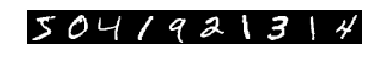

In [12]:
# we use a little trick to tile the first ten images
imshow(solver.net.blobs['data'].data[:10, 0].transpose(1, 0, 2).reshape(28, 10*28), cmap='gray'); axis('off')
print('train labels:', solver.net.blobs['label'].data[:10])

test labels: [7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


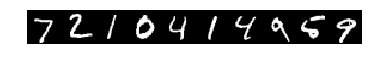

In [13]:
imshow(solver.test_nets[0].blobs['data'].data[:10, 0].transpose(1, 0, 2).reshape(28, 10*28), cmap='gray'); axis('off')
print('test labels:', solver.test_nets[0].blobs['label'].data[:10])

# Training Loop

In [14]:
%%time
niter =  1001
test_interval = 100
# losses will also be stored in the log
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))
train_acc = zeros(int(np.ceil(niter / test_interval)))
output = zeros((niter, 8, 10))

correct_train = 0

# the main solver loop
for it in range(niter):
    solver.step(1)  # SGD by Caffe
    
    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    
    # store the output on the first test batch
    # (start the forward pass at conv1 to avoid loading new data)
    solver.test_nets[0].forward(start='conv1')
    output[it] = solver.test_nets[0].blobs['score'].data[:8]
    
    correct_train += sum(solver.net.blobs['score'].data.argmax(1)
                           == solver.net.blobs['label'].data)
    
    # run a full test every so often
    # (Caffe can also do this for us and write to a log, but we show here
    #  how to do it directly in Python, where more complicated things are easier.)
    if it % test_interval == 0:
        train_acc[it // test_interval] = correct_train / (64*100)
        correct_train = 0
        print('Iteration', it, 'testing...')
        correct = 0
        for test_it in range(100):
            solver.test_nets[0].forward()
            correct += sum(solver.test_nets[0].blobs['score'].data.argmax(1)
                           == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4

/Users/Kallie/caffe/python/caffe/layers/Dropout_M.py:14: RuntimeWarning: divide by zero encountered in log
  eps = sigmoid(np.log(data**2))


Iteration 0 testing...
Iteration 100 testing...
Iteration 200 testing...
Iteration 300 testing...
Iteration 400 testing...
Iteration 500 testing...
Iteration 600 testing...
Iteration 700 testing...
Iteration 800 testing...
Iteration 900 testing...
Iteration 1000 testing...
CPU times: user 6min 48s, sys: 1min 4s, total: 7min 52s
Wall time: 5min 14s


* Training Accuracy

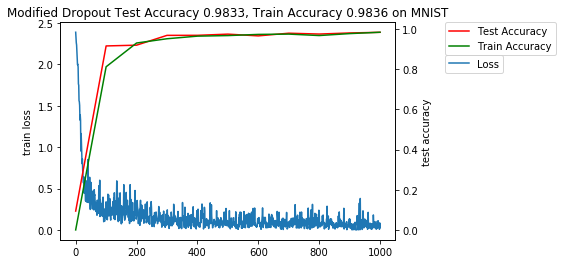

In [16]:

_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss, label="Loss")
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r', label="Test Accuracy")
ax2.plot(test_interval * arange(len(train_acc)), train_acc, 'g', label="Train Accuracy")
ax2.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
ax1.legend(bbox_to_anchor=(1.15, .85), loc=2, borderaxespad=0.)
ax2.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Modified Dropout Test Accuracy {:.4f}, Train Accuracy {:.4f} on MNIST'.format(test_acc[-1], train_acc[-1]))

savefig('mnist/figures/mod_train.jpg')
